# TD6 : Graphical models

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Initial DAG

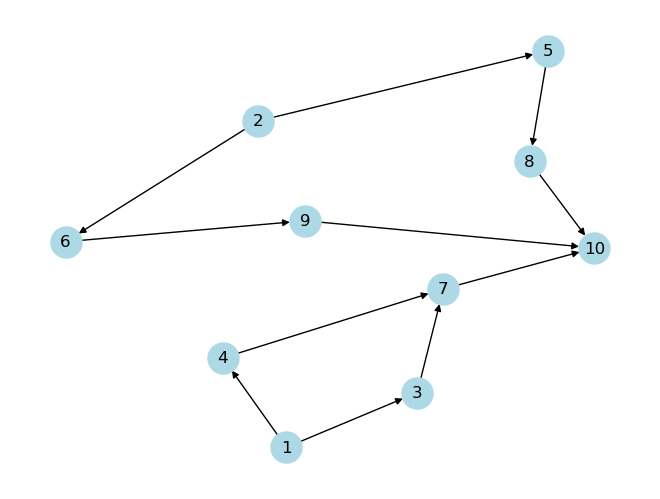

In [8]:
graph = nx.DiGraph()
graph.add_nodes_from(range(1, 11))
graph.add_edges_from([(1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (4, 7), (5, 8), (6, 9), (7, 10), (8, 10), (9, 10)])

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue')
plt.show()

## Random model in the DAG

In [22]:
rng = np.random.default_rng()
rng.normal()

def sim_one_vect(rng):
    rng = np.random.default_rng(rng)
    ret = np.zeros(10)
    ret[0] = rng.normal()
    ret[1] = rng.normal()
    ret[2] = ret[0] + rng.normal()
    ret[3] = ret[0] + rng.normal()
    ret[4] = ret[1] + rng.normal()
    ret[5] = ret[1] + rng.normal()
    ret[6] = ret[2] + ret[3] + rng.normal()
    ret[7] = ret[4] + rng.normal()
    ret[8] = ret[5] + rng.normal()
    ret[9] = ret[6] + ret[7] + ret[8] + rng.normal()
    return ret

sim_one_vect(1)

array([ 0.34558419,  0.82161814,  0.67602127, -0.95757304,  1.72697401,
        1.26799272, -0.81850501,  2.30809211,  1.63256511,  3.41628472])

In [71]:
nb_sim = 10000
sim_10000 = np.zeros((nb_sim, 10))
for i in range(nb_sim):
    sim_10000[i] = sim_one_vect(rng)

# Compute correlation matrix from data
sim_10000_centered = sim_10000 - sim_10000.mean(axis=0)[None, :]
cov = sim_10000_centered.T @ sim_10000_centered / sim_10000_centered.shape[0]
v = np.diag(cov) ** 0.5
empirical_cor_matrix = cov / v[:, None] / v[None, :]

In [69]:
empirical_prec_mat = np.linalg.inv(cov)
v = np.diag(empirical_prec_mat) ** 0.5
empirical_partial_cor = -empirical_prec_mat / v[:, None] / v[None, :]

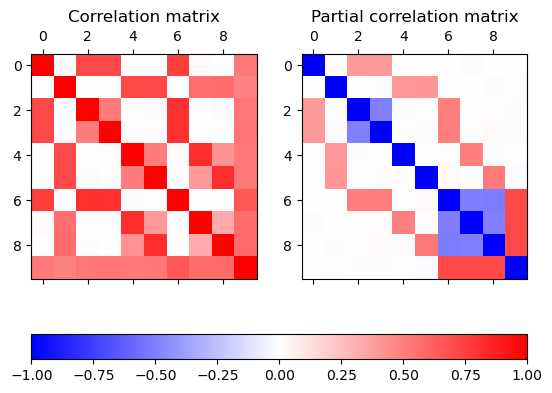

In [72]:
fig, axs = plt.subplots(1, 2)
axs[0].matshow(empirical_cor_matrix, cmap="bwr", vmin=-1, vmax=1)
axs[0].set_title("Correlation matrix")
axs[1].matshow(empirical_partial_cor, cmap="bwr", vmin=-1, vmax=1)
cbar = fig.colorbar(axs[0].imshow(empirical_cor_matrix, cmap="bwr", vmin=-1, vmax=1), ax=axs, orientation="horizontal")
axs[1].set_title("Partial correlation matrix")
plt.show()

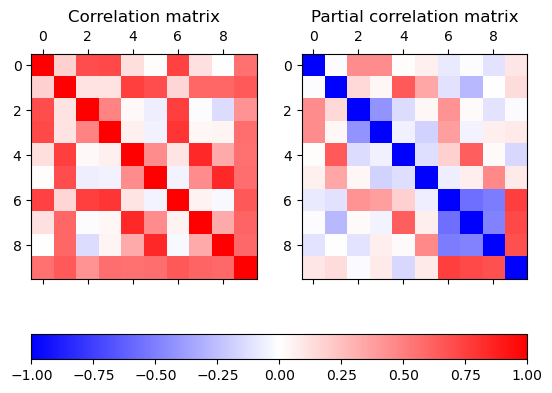

In [73]:
nb_sim = 100
sim_100 = np.zeros((nb_sim, 10))
for i in range(nb_sim):
    sim_100[i] = sim_one_vect(rng)

# Compute correlation matrix from data
sim_100_centered = sim_100 - sim_100.mean(axis=0)[None, :]
cov = sim_100_centered.T @ sim_100_centered / sim_100_centered.shape[0]
v = np.diag(cov) ** 0.5
empirical_cor_matrix = cov / v[:, None] / v[None, :]

empirical_prec_mat = np.linalg.inv(cov)
v = np.diag(empirical_prec_mat) ** 0.5
empirical_partial_cor = -empirical_prec_mat / v[:, None] / v[None, :]

fig, axs = plt.subplots(1, 2)
axs[0].matshow(empirical_cor_matrix, cmap="bwr", vmin=-1, vmax=1)
axs[0].set_title("Correlation matrix")
axs[1].matshow(empirical_partial_cor, cmap="bwr", vmin=-1, vmax=1)
cbar = fig.colorbar(axs[0].imshow(empirical_cor_matrix, cmap="bwr", vmin=-1, vmax=1), ax=axs, orientation="horizontal")
axs[1].set_title("Partial correlation matrix")
plt.show()

## Graphical lasso

In [76]:
from sklearn.covariance import GraphicalLasso

glasso = GraphicalLasso(alpha=0.01)
glasso.fit(sim_10000)
cov = glasso.covariance_
prec = glasso.precision_

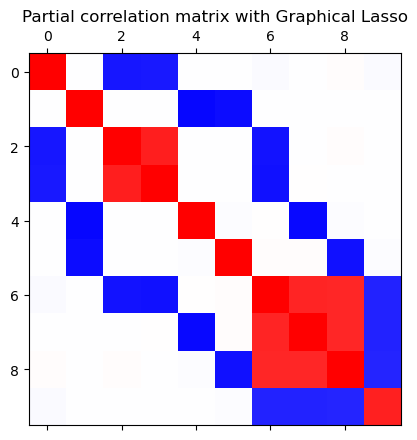

In [80]:
plt.matshow(prec, cmap="bwr", vmin=-1, vmax=1)
plt.title("Partial correlation matrix with Graphical Lasso")
plt.show()